In [1]:
import numpy as np
import pylab as plt
import h5py
import fitsio
import healpy as hp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import healsparse as hsp
import skyproj
from scipy import stats

In [14]:
plt.rcParams["axes.linewidth"]  = 1.0
plt.rcParams["xtick.major.size"]  = 10
plt.rcParams["xtick.minor.size"]  = 5
plt.rcParams["ytick.major.size"]  = 10
plt.rcParams["ytick.minor.size"]  = 5
plt.rcParams["xtick.direction"]  = "in"
plt.rcParams["ytick.direction"]  = "in"
plt.rcParams["legend.frameon"] = 'False'
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=13)

import os
if os.environ['USER'] == 'dhayaa':
    os.environ['PATH'] = f"{os.environ['PATH']}:/software/texlive-2022-el8-x86_64/bin/x86_64-linux/"

    
COLORS = ["f07167","219ebc","c767ac","ffba0a","59a270"]
COLORS = ['#' + c if c[0] != '#' else c for c in COLORS]

from cycler import cycler

# Update the default prop_cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=COLORS)

# Plot DELVE first

In [20]:
NSIDE = 256

Mask = []

for i in range(4):
    with h5py.File('/project/chihway/data/decade/metacal_gold_combined_20240209.hdf', 'r') as f:
        mask = f['baseline_mcal_mask_noshear'][:] == (i + 1)
        hpix = hp.ang2pix(NSIDE, f['RA'][:][mask], f['DEC'][:][mask], lonlat = True)

    Mask.append(np.bincount(hpix, minlength = hp.nside2npix(NSIDE)))

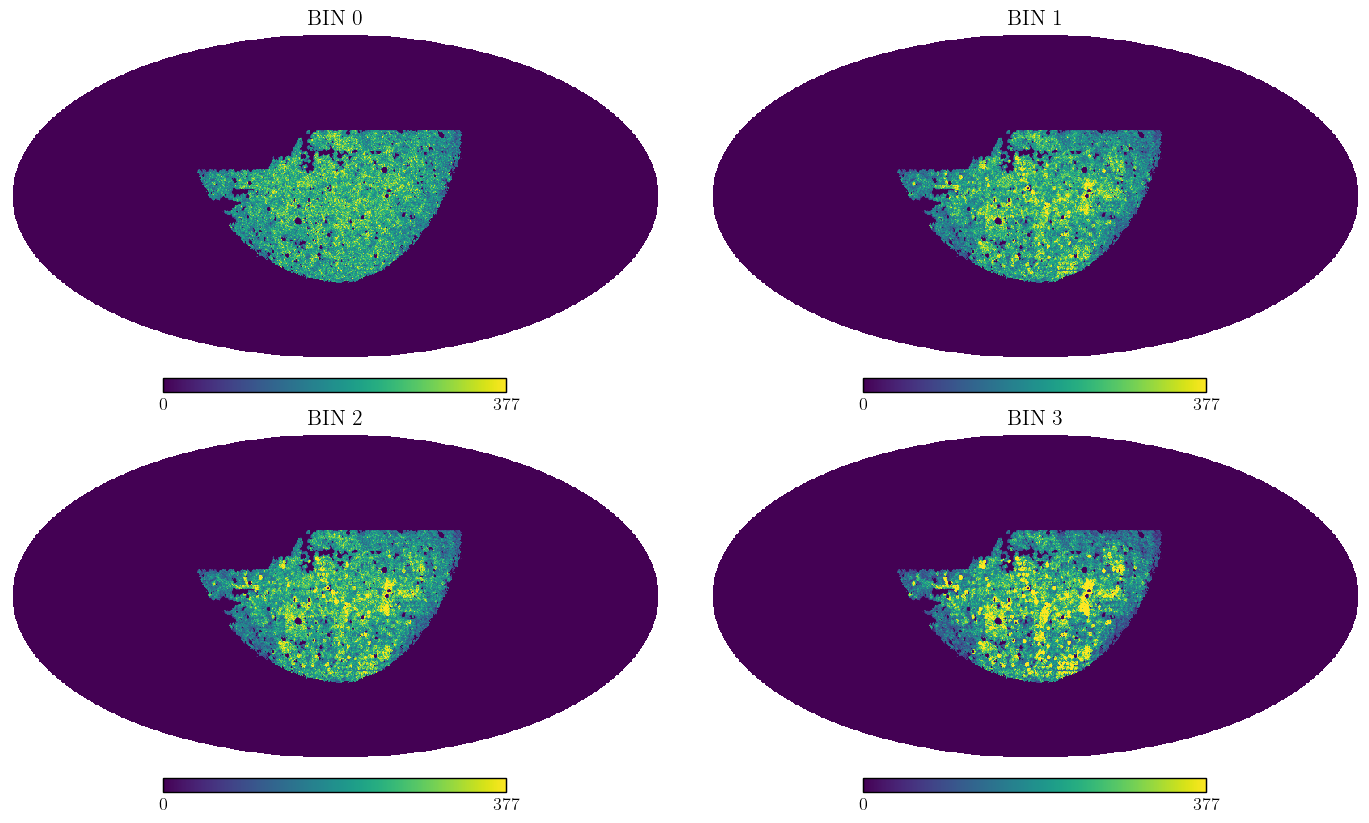

In [23]:
fig, ax = plt.subplots(2, 2, figsize = (14, 8), sharex = True, sharey = True)
maxval  = int(hp.nside2pixarea(NSIDE, degrees = True) * 60 * 60 * 2)
for i in range(4):
    hp.mollview(Mask[i], fig = fig, sub = (2, 2, i + 1), max = maxval, min = 0, title = f"BIN {i}", rot = [180, 0])
    ax.flat[i].grid(False)
    
    
for ax_i in ax.flat:
    ax_i.spines['top'].set_visible(False)
    ax_i.spines['right'].set_visible(False)
    ax_i.spines['left'].set_visible(False)
    ax_i.spines['bottom'].set_visible(False)
    ax_i.set_xticks([])
    ax_i.set_yticks([])

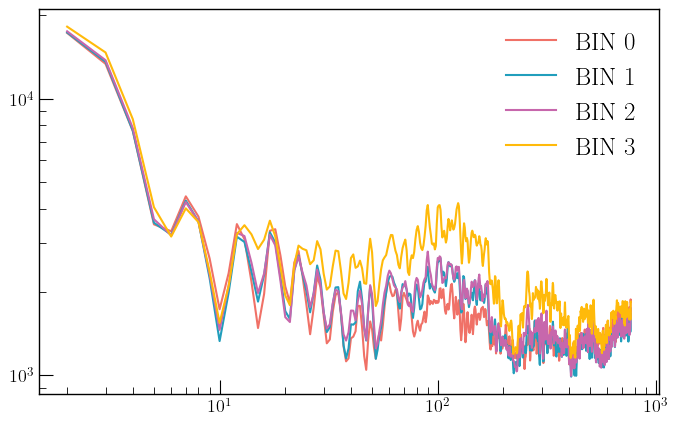

In [22]:
plt.figure(figsize = (8,5))

ell = np.arange(3*NSIDE)

for i in range(4): plt.plot(ell[2:], (ell**2 * hp.anafast(Mask[i]))[2:], label = f'BIN {i}')

plt.legend(fontsize = 18, frameon = False)
plt.loglog()
plt.show()

# Next do DES

In [16]:
with h5py.File('/project/chihway/dhayaa/DES_Catalogs/DESY3_indexcat.h5') as f:
    mcal_selection = f['index/select'][:]

with h5py.File('/project/chihway/dhayaa/DES_Catalogs/DESY3_metacal_v03-004.h5') as f:

    ra   = f['catalog/unsheared/ra'][:][mcal_selection]
    dec  = f['catalog/unsheared/dec'][:][mcal_selection]  
    hpix = hp.ang2pix(NSIDE, ra, dec, lonlat = True)


with h5py.File('/project/chihway/dhayaa/DES_Catalogs/DESY3_sompz_v0.40.h5', 'r') as f:

    bhat = f['catalog/sompz/unsheared/bhat'][:][mcal_selection]


Mask = [np.bincount(hpix[bhat == i], minlength = hp.nside2npix(NSIDE)) for i in range(4)]

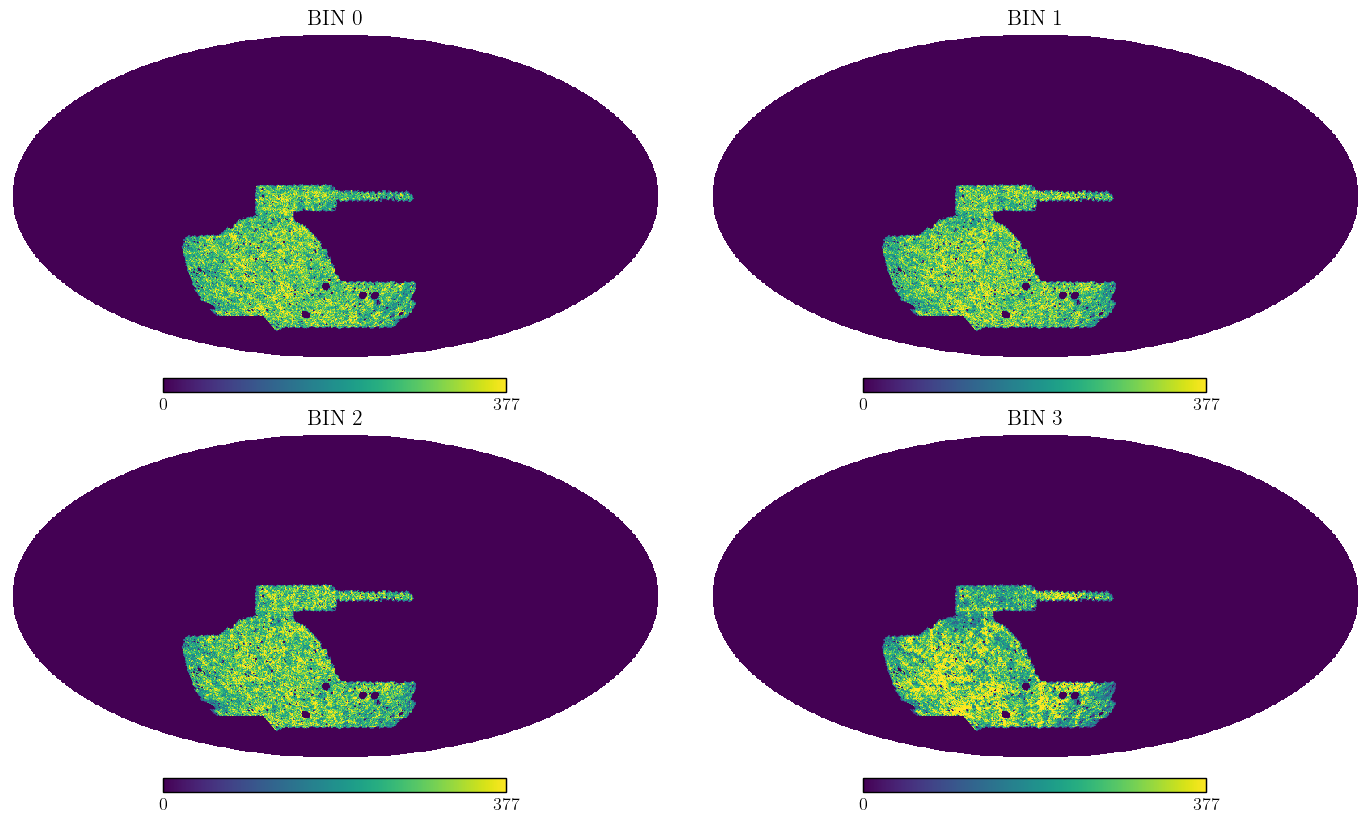

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (14, 8), sharex = True, sharey = True)
maxval  = int(hp.nside2pixarea(NSIDE, degrees = True) * 60 * 60 * 2)
for i in range(4):
    hp.mollview(Mask[i], fig = fig, sub = (2, 2, i + 1), max = maxval, min = 0, title = f"BIN {i}")
    ax.flat[i].grid(False)
    
    
for ax_i in ax.flat:
    ax_i.spines['top'].set_visible(False)
    ax_i.spines['right'].set_visible(False)
    ax_i.spines['left'].set_visible(False)
    ax_i.spines['bottom'].set_visible(False)
    ax_i.set_xticks([])
    ax_i.set_yticks([])

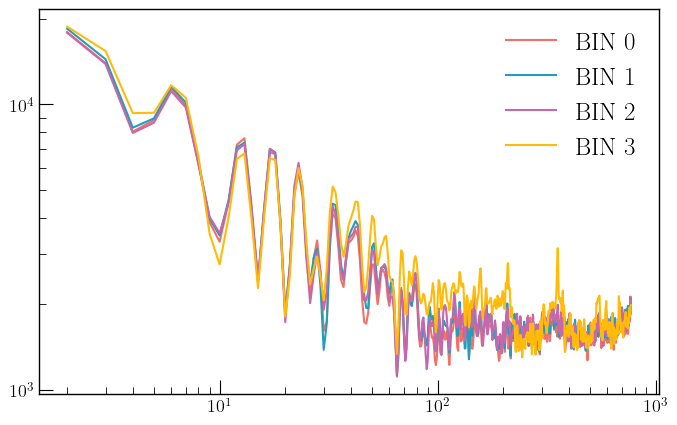

In [19]:
plt.figure(figsize = (8,5))

ell = np.arange(3*NSIDE)

for i in range(4): plt.plot(ell[2:], (ell**2 * hp.anafast(Mask[i]))[2:], label = f'BIN {i}')

plt.legend(fontsize = 18, frameon = False)
plt.loglog()
plt.show()